In [1]:
import numpy as np
import pandas as pd
import geopandas
from geodatasets import get_path
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
df = pd.read_csv('Dataset .csv')

In [4]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.shape

(9551, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
def getting_cat_cols(df):
    cat = []
    for name, dtype in df.dtypes.items():
        if dtype == 'object':
            cat.append(name)
    return cat

In [10]:
cat_cols = getting_cat_cols(df)

In [11]:
lr = LabelEncoder()
def label_encoding(df, cat_cols):
    for i in cat_cols:
        df[i] = lr.fit_transform(df[i])
    return df

In [12]:
df = label_encoding(df, cat_cols)

# Aggreate rattings


<Axes: xlabel='Aggregate rating', ylabel='count'>

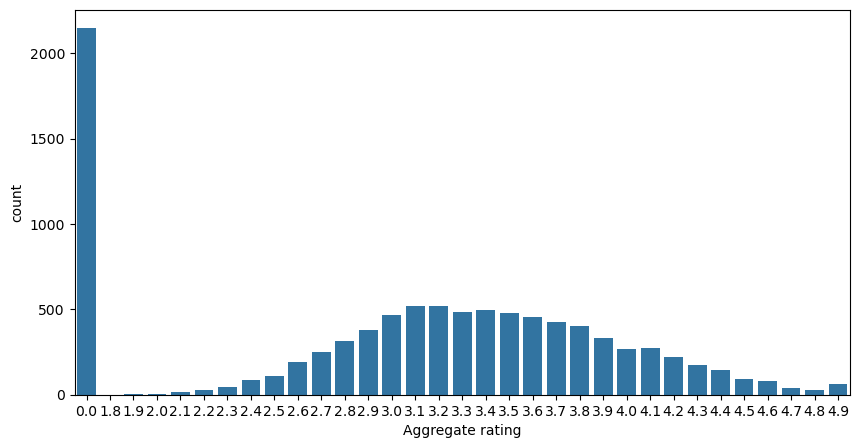

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(df, x='Aggregate rating')

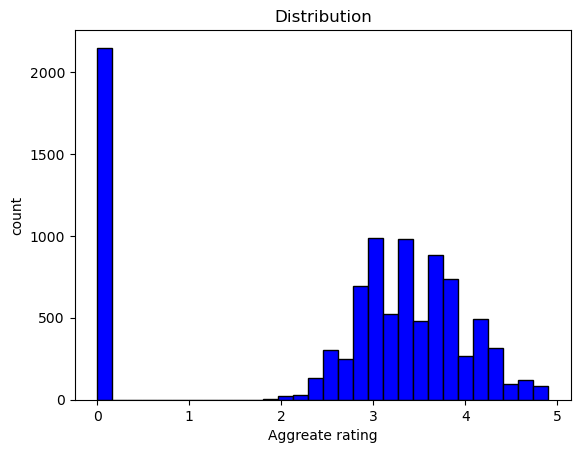

In [14]:
plt.hist(df["Aggregate rating"] ,bins = 30 ,color = 'blue' , edgecolor = 'black' )
plt.xlabel('Aggreate rating')
plt.ylabel('count')
plt.title('Distribution')
plt.show()

In [15]:
avg_vote = round(df['Votes'].mean(),3)
print("The average number of votes recived by resturant :" ,avg_vote)

The average number of votes recived by resturant : 156.91


<Axes: >

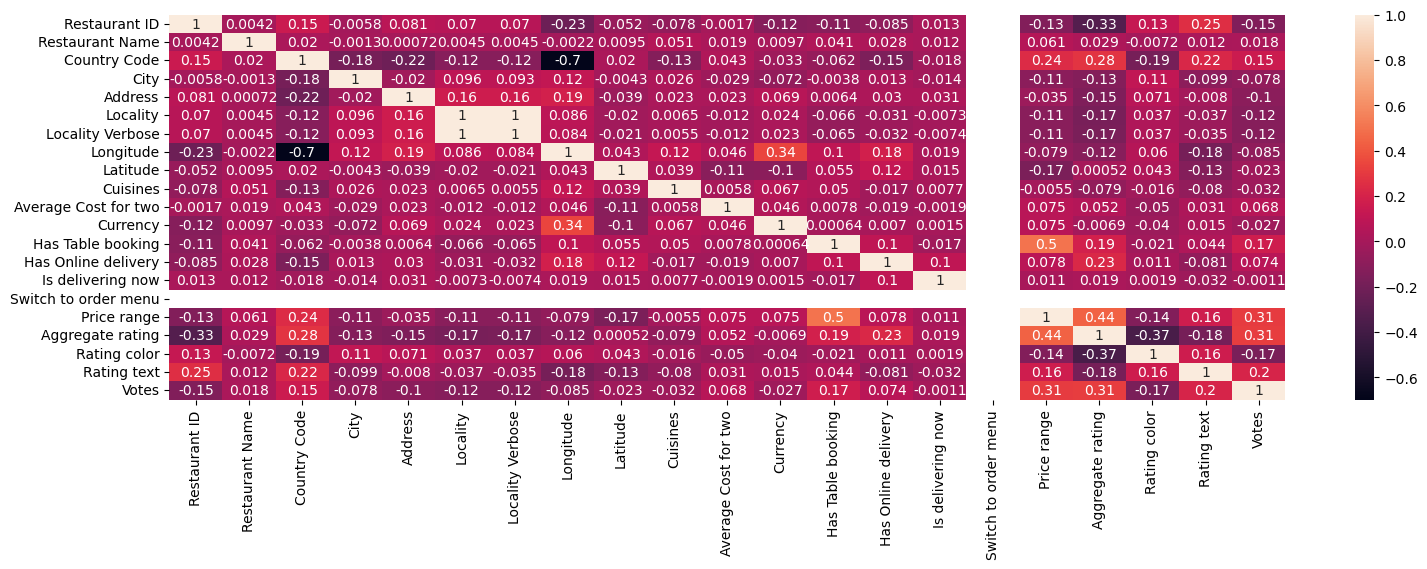

In [16]:
plt.figure(figsize=(18, 5))
sns.heatmap(df.corr(), annot=True)

In [17]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [18]:
x = df.drop(['Restaurant ID', 'Aggregate rating'], axis=1)
y = df['Aggregate rating']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [20]:
print(f"X train shpae: {x_train.shape}")
print(f"X test shpae: {x_test.shape}")
print(f"y train shpae: {y_train.shape}")
print(f"y test shpae: {y_test.shape}")

X train shpae: (7640, 19)
X test shpae: (1911, 19)
y train shpae: (7640,)
y test shpae: (1911,)


### Linear Regression 

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)

In [24]:
print(f"Mean squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy: {r2_score(y_test, y_pred)}")

Mean squared Error: 1.345854436939398
Mean absolute Error: 0.9566726911762379
Accuracy: 0.41880810256261836


### Random forest

In [40]:
model_rf = RandomForestRegressor(n_estimators=200, criterion='squared_error', random_state=42, verbose=True, max_samples=100)

In [41]:
model_rf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


RandomForestRegressor(max_samples=100, n_estimators=200, random_state=42,
                      verbose=True)

In [42]:
y_pred = model_rf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.1s


In [43]:
print(f"Mean squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Accuracy: {r2_score(y_test, y_pred)}")

Mean squared Error: 0.03617001582940864
Mean absolute Error: 0.1319468864468865
Accuracy: 0.9843803909596349


<Axes: >

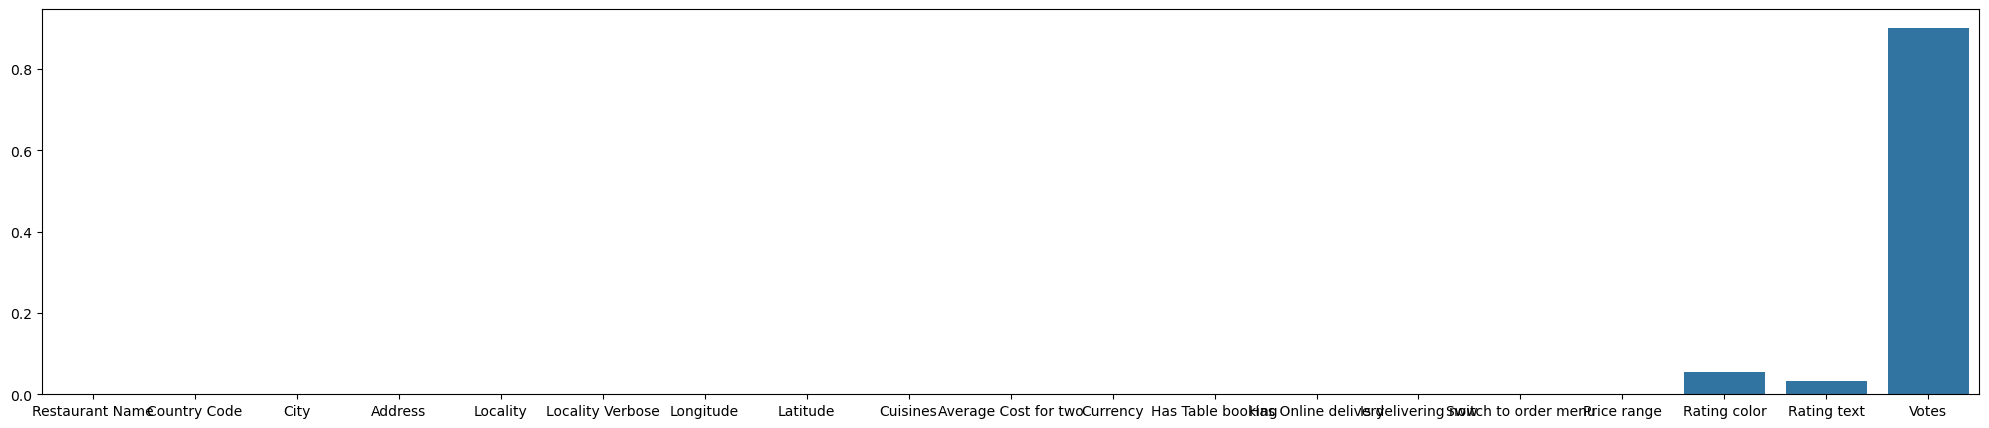

In [44]:
plt.figure(figsize=(25,5))
sns.barplot(x=model_rf.feature_names_in_, y=model_rf.feature_importances_)

In [47]:
with open('./model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

# task 2

In [13]:
common_combinations = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending = False)
top10 = common_combinations.head(10)
print(top10)

Cuisines
683     4.9
169     4.9
1062    4.9
37      4.9
302     4.9
33      4.9
1034    4.9
796     4.9
803     4.9
41      4.9
Name: Aggregate rating, dtype: float64


In [14]:
max_rating = common_combinations.iloc[0]
print("the max ratting ",max_rating)

the max ratting  4.9


In [15]:
max_rated_rest = df.loc[df["Aggregate rating"] == max_rating]
print(max_rated_rest)

      Restaurant ID  Restaurant Name  Country Code  City  Address  Locality  \
3           6318506             4707           162    75     8690       862   
8           6300010             6045           162    94     6979      1001   
10          6309903             5850           162    95     2838       516   
39          6600427             1705            30    21     7309       970   
48          7300955              945            30   111     7088       390   
...             ...              ...           ...   ...      ...       ...   
9484          75989             5322           189   103     8662      1181   
9514        5800176             4177           191    30     6700       732   
9524        6004011             2559           208     6     5278       356   
9538        5901782             6080           208   140     3889       110   
9540        5927248             2119           208   140     4257       153   

      Locality Verbose   Longitude   Latitude  Cuis

In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [32]:
df['Cuisines'].value_counts()

Cuisines
1306    936
1329    511
497     354
828     354
1514    334
       ... 
225       1
1548      1
599       1
200       1
1110      1
Name: count, Length: 1826, dtype: int64

In [26]:
X = df[['Country Code', 'City', 'Locality', 'Longitude', 'Latitude', 
          'Average Cost for two', 'Currency', 'Has Table booking', 
          'Has Online delivery', 'Is delivering now', 'Price range', 
          'Aggregate rating', 'Votes']]
y = df['Cuisines']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [28]:
model_rf_clf = RandomForestClassifier(n_estimators=200, criterion='gini', random_state=42, verbose=True, max_samples=100)

In [29]:
model_rf_clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s


RandomForestClassifier(max_samples=100, n_estimators=200, random_state=42,
                       verbose=True)

In [30]:
y_pred_clf = model_rf_clf.predict(x_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 199 tasks      | elapsed:    0.8s


In [31]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_clf)}")
print(f"Classification Report \n: {classification_report(y_test, y_pred_clf)}")
print(f"Confusion Matrix \n: {confusion_matrix(y_test, y_pred_clf)}")

Accuracy: 0.11721611721611722
Classification Report 
:               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         3
          30       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          39       0.00   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

## Task 3

In [22]:
print(df[["Longitude" , "Latitude"]])

       Longitude   Latitude
0     121.027535  14.565443
1     121.014101  14.553708
2     121.056831  14.581404
3     121.056475  14.585318
4     121.057508  14.584450
...          ...        ...
9546   28.977392  41.022793
9547   29.041297  41.009847
9548   29.034640  41.055817
9549   29.036019  41.057979
9550   29.026016  40.984776

[9551 rows x 2 columns]


In [23]:
gdf = geopandas.GeoDataFrame(df, geometry = geopandas.points_from_xy(df.Longitude, df.Latitude), crs = "EPSG:4326")

In [24]:
print(gdf.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

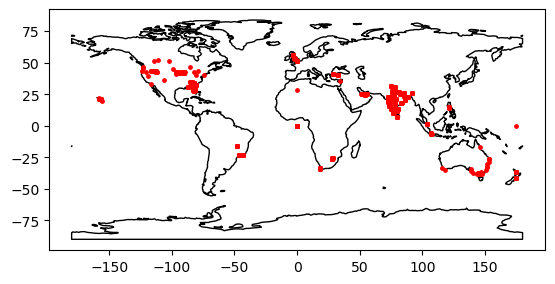

In [27]:
world = geopandas.read_file(get_path("naturalearth.land"))
ax = world.plot(color = 'White', edgecolor = 'black')
gdf.plot(ax = ax, marker = 'o',color ='red',markersize = 6)
plt.show()

In [29]:
world_map = folium.Map(location = [df['Latitude'].mean(),df['Longitude'].mean()], zoom_start = 1 ,height = '100%',width = '100%')

In [30]:
heat_marker = [[row['Latitude'], row['Longitude'] ]for i,row in df.iterrows()]
HeatMap(heat_marker, radius = 10).add_to(world_map)

In [31]:
world_map

# Task 4

In [34]:
resturant_chain = df.groupby('Restaurant Name').size().reset_index(name = 'OutletCount')
new = resturant_chain[resturant_chain['OutletCount']>1]
resturant_chain = new.sort_values(by = 'OutletCount', ascending = False)

In [37]:
print(resturant_chain[['Restaurant Name' , "OutletCount"]].head(10))

       Restaurant Name  OutletCount
1098   Cafe Coffee Day           83
2098    Domino's Pizza           79
6106            Subway           63
2716  Green Chick Chop           51
4077        McDonald's           48
3478         Keventers           34
4961         Pizza Hut           30
2619             Giani           29
680     Baskin Robbins           28
663    Barbeque Nation           26


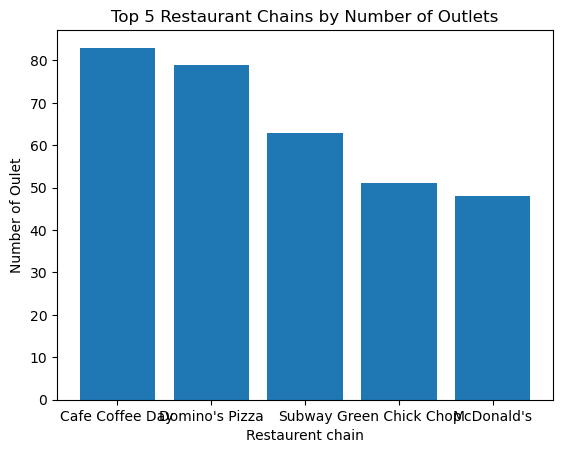

In [38]:
plt.bar(resturant_chain["Restaurant Name"][:5], resturant_chain["OutletCount"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Number of Oulet")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

In [41]:
ratings  = df.groupby("Restaurant Name")["Aggregate rating"].mean().reset_index(name = "Average Rating").sort_values(by = "Average Rating", ascending = False )


In [50]:
Votes = df.groupby("Restaurant Name")['Votes'].sum().reset_index(name = "Total Votes").sort_values(by = "Total Votes",ascending = False)
print(Votes)

                Restaurant Name  Total Votes
663             Barbeque Nation        28142
101   AB's - Absolute Barbecues        13400
6943                       Toit        10934
785                   Big Chill        10853
2297                 Farzi Cafe        10098
...                         ...          ...
4375                  Muncheezz            0
6217            Swiss Gourmessa            0
2110      Dosa and Pizza Corner            0
6215            Sweets n Treats            0
2433               Food Station            0

[7446 rows x 2 columns]


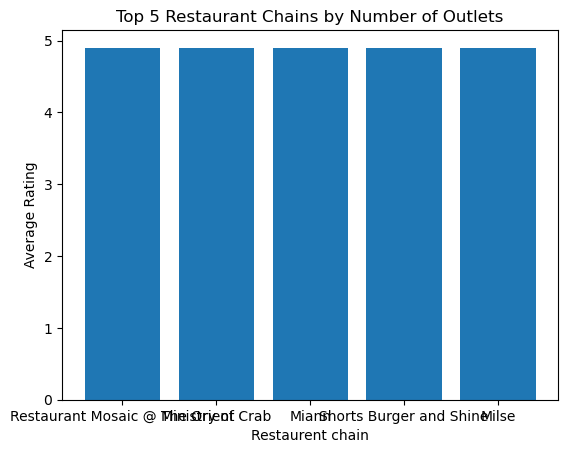

In [52]:
plt.bar(ratings["Restaurant Name"][:5], ratings["Average Rating"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Average Rating")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.show()

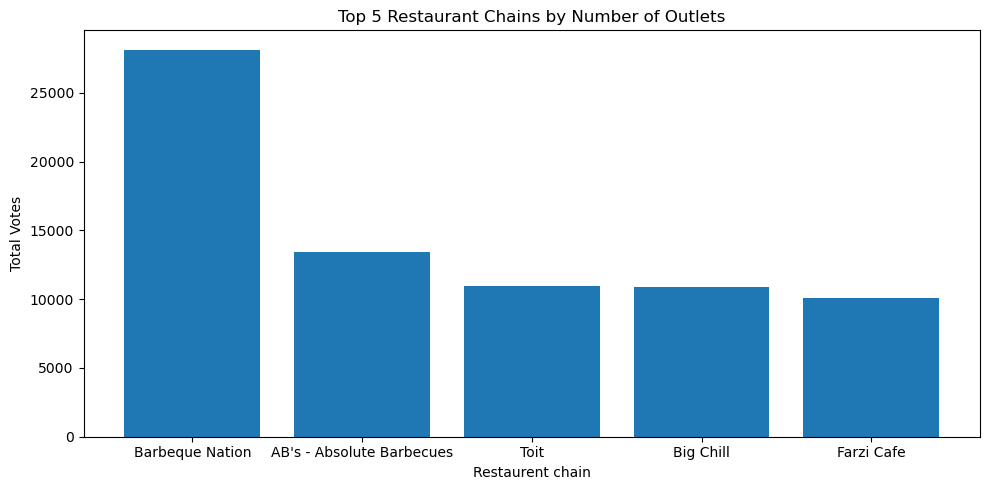

In [55]:
plt.figure(figsize=(10,5))
plt.bar(Votes["Restaurant Name"][:5], Votes["Total Votes"][:5])
plt.xlabel("Restaurent chain")
plt.ylabel("Total Votes")
plt.title("Top 5 Restaurant Chains by Number of Outlets")
plt.tight_layout()
plt.show()